In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# Filter characteristics.
numTaps = 9
fSample = 10e3
fNyquist = fSample/2
fc = 2000

wc = fc/fNyquist

taps = signal.firwin(numTaps,wc)
print(taps)

[-0.00614041 -0.01358167  0.0512323   0.26565556  0.40566846  0.26565556
  0.0512323  -0.01358167 -0.00614041]


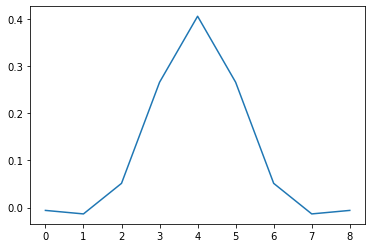

In [3]:
plt.plot(taps)

In [4]:
# Quantify taps
nBits = 15
tapsQ = np.floor(taps * 2**nBits) / 2**nBits
print(tapsQ)

[-0.00616455 -0.01361084  0.0512085   0.26565552  0.40563965  0.26565552
  0.0512085  -0.01361084 -0.00616455]


[  -7.  -20.   31.  297.  702.  968. 1019. 1005.  999.]


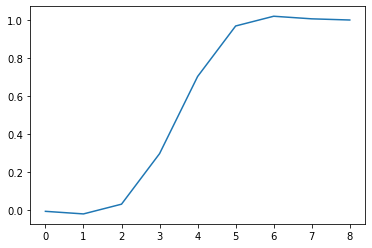

In [5]:
x = np.ones(numTaps)
x_filt = signal.lfilter(tapsQ,1,x)
plt.plot(x_filt)
print(np.floor(x_filt*1000))

In [6]:
[z,p,k] = signal.tf2zpk(taps, 1)

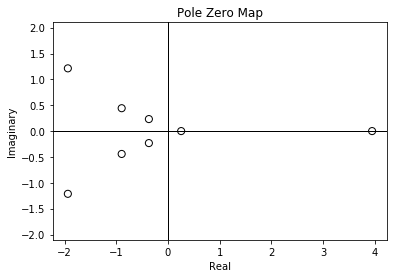

In [7]:
import control
hz = control.tf(taps, 1, 1)
control.pzmap(hz)
plt.savefig("fir_pzmap.svg")
